# Trabalho Análise de Sentimentos
# - Dataset Tweets
# Grupo: Harlan e Emmanuel


### - [Imports](#imp)
### - [Carregando os dados, primeira análise](#car)
### - [Vetorização](#vet)
### - [Teste com Naive Bayes](#nb)
### - [Teste com SVM](#svm)
### - [Deep Learning](#dl)
### - [MLP](#mlp)
### - [RNN](#rnn)

# Imports<a id='imp'></a>

In [119]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop, Adam, SGD


In [74]:
os.listdir('data')

['full_test.txt',
 'full_train.txt',
 'training.1600000.processed.noemoticon.csv']

# Carregando os dados<a id='car'></a>

In [75]:
cols = ['sentiment','id','date','query_string','user','text']

raw_df = pd.read_csv("data/training.1600000.processed.noemoticon.csv",
                          header=None, names=cols, encoding = "ISO-8859-1")

In [76]:
raw_df.head(15)

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [77]:
raw_df_filtered = raw_df[['sentiment', 'text']]

del raw_df

In [78]:
pd.set_option('max_colwidth', 200)
raw_df_filtered.head(15)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


### Distribuição do tamanho dos tweets

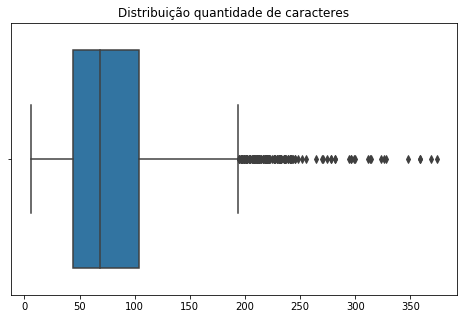

In [79]:
plt.figure(figsize=(8,5))
plt.title("Distribuição quantidade de caracteres")
_ = sns.boxplot(raw_df_filtered.text.str.len().values)

### Existem 17174 tweets com mais de 140 caracteres. Uma parte disso é de qualidade bem ruim, mas a quantidade é irrelevante com relação ao tamanho do dataset.

In [80]:
raw_df_filtered[raw_df_filtered.text.str.len() > 140].count().values[0]

17174

### O dataset está equilibrado?

In [81]:
raw_df_filtered.groupby('sentiment').count()

,text
sentiment,
0,800000
4,800000


### Sim, está equilibrado, mas é bom alterar o label para 0 e 1

In [82]:
raw_df_filtered.sentiment = raw_df_filtered.sentiment.apply(lambda x: 1 if x == 4 else 0)

In [83]:
raw_df_filtered.groupby('sentiment').count()

,text
sentiment,
0,800000
1,800000


### Vamos olhar alguns assuntos

In [84]:
raw_df_filtered[raw_df_filtered.text.str.contains('(software)|(engineering)|(developer)')].groupby('sentiment').count()

C:\Users\Maas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text
sentiment,
0,614
1,479


In [85]:
raw_df_filtered[raw_df_filtered.text.str.contains('(Michael)|(Jackson)|(madonna)')].groupby('sentiment').count()

C:\Users\Maas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text
sentiment,
0,546
1,868


In [86]:
raw_df_filtered[raw_df_filtered.text.str.contains('(friend)')].groupby('sentiment').count()

C:\Users\Maas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text
sentiment,
0,13985
1,15648


In [87]:
raw_df_filtered[raw_df_filtered.text.str.contains('(friend)')].head(20)

C:\Users\Maas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,sentiment,text
21,0,"one of my friend called me, and asked to meet with her at Mid Valley today...but i've no time *sigh*"
39,0,Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then class 6-10. Another day that's gonna fly by. I miss my girlfriend
51,0,"@localtweeps Wow, tons of replies from you, may have to unfollow so I can see my friends' tweets, you're scrolling the feed a lot."
179,0,"Staying at a friends house...house sitting, neighbors are SO loud-having a party"
293,0,"@riancurtis i'm here, friend, and i love you."
381,0,HELP! I need a new boyfriend... I'm stuck in a rut
488,0,have watched that considering today. yaknow. shawnna tomomorrow;i need my bestfriend
517,0,"http://is.gd/r8Zf, http://is.gd/r8Zy, and http://is.gd/r8ZG - test footage with my girlfriend (in HD) The dark one is underxposed"
539,0,"@KelleyRowe hey, you remember that time we used to be friends?? ;) ugh. vomit. sick. i need sleep"
700,0,trying to figure out this twitter thing...none of my friends are on yet. Soo much to see.


### O dataset e grande, vamos pegar um subconjunto aleatório (equilibrado)

In [88]:
#tamanho_amostra = 500_000
#tamanho_amostra = 300_000
tamanho_amostra = 200_000
#tamanho_amostra = 100_000


sample_df_0 = raw_df_filtered[raw_df_filtered.sentiment==0].sample(tamanho_amostra//2, random_state = 99)
sample_df_1 = raw_df_filtered[raw_df_filtered.sentiment==1].sample(tamanho_amostra//2, random_state = 99)

sample_df = pd.concat([sample_df_0, sample_df_1])

del sample_df_0
del sample_df_1

del raw_df_filtered

sample_df.groupby('sentiment').count()

,text
sentiment,
0,100000
1,100000


# Chegou a hora de vetorizar o dataset <a id="vet">

### Vamos usar o CountVectorizer

### Intuitivamente, acreditamos que palavras raras não agregam na classificação porque:
### - a raridade pode enviesar o seu significado devido à "má sorte" na amostra
### - o vocabulário fica grande demais, dificultando o treino
### - é possível que a memória não seja suficiente para tratar os dados
### - existe uma grande chance de serem "typos"

### Mas qual taxa de frequência usar?

### Vamos testar algumas taxas mínimas para ver o que acontece

In [89]:
total_tokens = CountVectorizer(min_df = 1).fit_transform(sample_df.text.values).shape[1]
total_tokens

160696

### O que acontece se exigirmos a presença em 2 documentos no mínimo?

In [90]:
CountVectorizer(min_df = 2).fit_transform(sample_df.text.values).shape

(200000, 44921)

### Vamos tentar achar alguma taxa que resulte em um número rasoável de tokens
### Procuramos no intervalo entre 0.01% e 0.1% 

In [91]:
min_rate = np.linspace(.0001, .001, 10)
min_rate

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])

In [92]:
def test_min(rate):
    
    r_list = []
    tokens_list = []
    
    for r in rate:
        
        r_list.append(r*100)
        
        count_vectorizer = CountVectorizer(min_df = r)
        
        token_count = count_vectorizer.fit_transform(sample_df.text.values).shape[1]
        
        tokens_list.append(token_count)
        
        print(f'min: {r*100:.2f}% tokens: {token_count}')

    plt.title('taxa x tokens')
    plt.grid()
    plt.axvline(x=0.05, color='r')
    plt.plot(r_list, tokens_list)

min: 0.01% tokens: 6428
min: 0.02% tokens: 3815
min: 0.03% tokens: 2846
min: 0.04% tokens: 2305
min: 0.05% tokens: 1921
min: 0.06% tokens: 1683
min: 0.07% tokens: 1495
min: 0.08% tokens: 1343
min: 0.09% tokens: 1224
min: 0.10% tokens: 1138


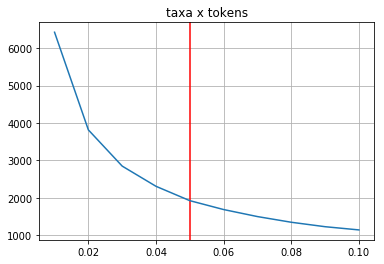

In [93]:
test_min(min_rate)

### Com uma presença mínima de 0.05% chegamos a um número interessante de tokens, em torno das 2000 palavras.

In [94]:
#count_vectorizer_params = CountVectorizer(min_df = 0.0001, max_df = .05).fit_transform(sample_df.text.values)
count_vectorizer_params = CountVectorizer(min_df = 0.0005, max_df = .05).fit_transform(sample_df.text.values)

### Se exigirmos uma presença máxima em 5%, conseguimos eliminar mais alguns tokens, provavelmente, artigos, pronomes, conectivos...

### Vamos ficar com esses valores, o que resulta em uma diminuição significativa

In [95]:
print(f'filtrado: {count_vectorizer_params.shape[1]} - total:' + \
      f' {total_tokens} - taxa: {count_vectorizer_params.shape[1]/total_tokens *100:.2f}%')


filtrado: 1891 - total: 160696 - taxa: 1.18%


# Vamos testar o modelo Naive Bayes<a id='nb'></a>

In [96]:
X_params = count_vectorizer_params.toarray()

In [97]:
y_params = sample_df.sentiment.values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_params, y_params, test_size=0.30, random_state=99)

In [99]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Apesar do número bastante inferior de tokens, não houve perda significativa na classificação

In [100]:
accuracy_score(y_test, nb.predict(X_test))

0.7473

In [101]:
target_names = ['neg', 'pos']
print(classification_report(y_test, nb.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.74      0.77      0.75     29922
         pos       0.76      0.73      0.74     30078

   micro avg       0.75      0.75      0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



### F1 score é uma boa opção quando a regra de negócio não determinou o que é mais importante entre:
### - precisão do 'chute' e
### - sensibilidade

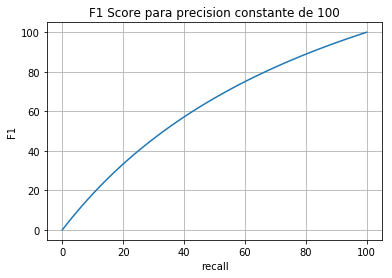

In [102]:
prec = np.ones(100) * 100
rec = np.linspace(0,100, 100)
F1 = 2 * (prec * rec) / (prec + rec)
plt.grid()
plt.xlabel('recall')
plt.ylabel('F1')
plt.title('F1 Score para precision constante de 100')
plt.plot(rec, F1)

# Vamos testar com um modelo de Support Vector Machine <a id="svm">

In [103]:
svc = LinearSVC(random_state=99)

In [104]:
svc.fit(X_train, y_train)

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=99, tol=0.0001,
     verbose=0)

### Podemos dizer que houve um empate entre os modelos SVM e Naive Bayes

In [105]:
accuracy_score(y_test, svc.predict(X_test))

0.76175

In [106]:
target_names = ['neg', 'pos']
print(classification_report(y_test, svc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.78      0.72      0.75     29922
         pos       0.74      0.80      0.77     30078

   micro avg       0.76      0.76      0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



# Deep Learning <a id="dl">

### MLP<a id="mlp">

### Aqui começaremos com um modelo MLP. Com o aumento da complexidade, esperamos um rendimento que justifique esse custo maior.

In [107]:
X_train.shape

(140000, 1891)

In [131]:
model_mlp = Sequential()

model_mlp.add(Input(shape=(X_train.shape[1],)))
model_mlp.add(Dense(128, activation='sigmoid'))
model_mlp.add(Dense(128, activation='sigmoid'))
model_mlp.add(Dense(128, activation='sigmoid'))
model_mlp.add(Dense(1, activation='sigmoid'))

### EarlyStopping baseado na acurácia de validação

In [132]:
callback_es_mlp = EarlyStopping(
    monitor="val_acc",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

checkpoint_filepath_mlp = './mlp/'



model_checkpoint_callback_mlp = ModelCheckpoint(
    filepath=checkpoint_filepath_mlp,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)



In [133]:
opt_mlp = RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.01,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

opt2_mlp = Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

opt3_mlp = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)


model_mlp.compile(optimizer=opt_mlp, loss='binary_crossentropy', metrics=['acc'])


In [134]:
model_mlp.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               242176    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 275,329
Trainable params: 275,329
Non-trainable params: 0
_________________________________________________________________


<h1 style="color:red">Treinar?</h1>

In [135]:
TRAIN_MLP = True

In [136]:
history_mlp = {}

if TRAIN_MLP:
    history_mlp = model_mlp.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.25,
                    callbacks=[callback_es_mlp, model_checkpoint_callback_mlp])
else:
    model_mlp.load_weights(checkpoint_filepath_mlp)

Epoch 1/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6935 - acc: 0.5031 - val_loss: 0.6937 - val_acc: 0.4989
Epoch 2/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6929 - acc: 0.5074 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 3/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6917 - acc: 0.5227 - val_loss: 0.6906 - val_acc: 0.5020
Epoch 4/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6878 - acc: 0.5656 - val_loss: 0.6824 - val_acc: 0.6673
Epoch 5/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6688 - acc: 0.6502 - val_loss: 0.6474 - val_acc: 0.6507
Epoch 6/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6107 - acc: 0.7029 - val_loss: 0.5784 - val_acc: 0.7255
Epoch 7/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.5575 - acc: 0.7285 - val_loss: 0.5455 - val_acc: 0.7417
Epoch 8/100
1641/1641 [==============================] 

1641/1641 [==============================] - 3s 2ms/step - loss: 0.4861 - acc: 0.7736 - val_loss: 0.5016 - val_acc: 0.7664
Epoch 62/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4860 - acc: 0.7732 - val_loss: 0.5032 - val_acc: 0.7646
Epoch 63/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4860 - acc: 0.7737 - val_loss: 0.5021 - val_acc: 0.7669
Epoch 64/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4859 - acc: 0.7741 - val_loss: 0.5014 - val_acc: 0.7673
Epoch 65/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4857 - acc: 0.7741 - val_loss: 0.5013 - val_acc: 0.7675
Epoch 66/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4858 - acc: 0.7738 - val_loss: 0.5009 - val_acc: 0.7679
Epoch 67/100
1641/1641 [==============================] - 3s 2ms/step - loss: 0.4855 - acc: 0.7735 - val_loss: 0.5012 - val_acc: 0.7679
Epoch 68/100
1641/1641 [==============================] - 3s 

### O resultado foi mais estável com a sigmoid. 
### A relu teria dado overfitting se não fosse o early stopping.

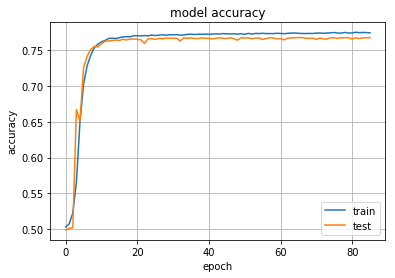

In [137]:
plt.plot(history_mlp.history['acc'])
plt.plot(history_mlp.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [138]:
accuracy_score(y_test, np.round(model_mlp.predict(X_test)))

0.76375

In [139]:
target_names = ['neg', 'pos']
print(classification_report(y_test, np.round(model_mlp.predict(X_test)), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.77      0.75      0.76     29922
         pos       0.76      0.77      0.77     30078

   micro avg       0.76      0.76      0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



### RNN<a id="rnn">

### Vamos usar outra estratégia de vetorização. Agora o resultado é uma série de vetores com os índices dos tokens em cada tweet na ordem em que eles aparecem.

### Com isso, nosso 'X' ficará bem menor porque, teoricamente, a largura máxima dele seria < 140, dado o tamanho de um tweet em caracteres.

### Assim, podemos nos dar o luxo de trabalhar com uma quantidade maior de palavras, o que a memória não nos permitia quando a vetorização resultava em um vetor esparso.

In [246]:
print(f'Quantidade de palavras encontradas pelo CountVectorizer: {total_tokens}')

Quantidade de palavras encontradas pelo CountVectorizer: 160696


In [176]:
#max_words = 2_000
max_words = 30_000


tokenizer = Tokenizer(num_words = max_words, lower=True, split=" ")

tokenizer.fit_on_texts(sample_df.text.values)

tokens = tokenizer.texts_to_sequences(sample_df.text.values)

### Esse tokenizer resulta em um array de índices de tokens, por isso, ele tem tamanho variável

In [206]:
sample_df.head()

,sentiment,text
246924,0,its a shame she is going to lose
777523,0,loving the new tat but hating no pool for a week
414068,0,"Didn't want to get out of that burning hot shower, but a spider in the corner of the bathroom was plotting to get me"
763462,0,that's lame that ED McMahon died..
224680,0,promised jr ud get throwed with him tongiht :-o thank god i said no beer! six pack calories are killin .e im drunk


In [177]:
tokens[:5]

[[70, 4, 791, 140, 8, 45, 2, 1057],
 [695, 3, 79, 3997, 18, 2626, 36, 750, 10, 4, 144],
 [150,
  76,
  2,
  32,
  31,
  12,
  17,
  2351,
  258,
  619,
  18,
  4,
  2784,
  11,
  3,
  2093,
  12,
  3,
  2195,
  25,
  14067,
  2,
  32,
  14],
 [143, 961, 17, 1732, 5341, 621],
 [3922,
  3457,
  10184,
  32,
  21,
  153,
  29099,
  317,
  171,
  324,
  1,
  306,
  36,
  940,
  1717,
  1354,
  6445,
  35,
  5814,
  579,
  59,
  1020]]

### Que tamanho tem o vetor mais largo?

In [178]:
len_max = 0
for i in range(len(tokens)):
    if len_max < len(tokens[i]):
        len_max = len(tokens[i])

len_max

38

### Resolvemos isso padronizando o tamanho de cada sequência de tokens, vamos usar o mesmo tamanho de nosso vocabulário, mas poderia ser outro tamanho

In [179]:
X_deep = sequence.pad_sequences(tokens, maxlen = len_max)

In [180]:
X_deep.shape

(200000, 38)

In [181]:
X_deep[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,    70,     4,   791,   140,     8,    45,
            2,  1057],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
          695,     3,    79,  3997,    18,  2626,    36,   750,    10,
            4,   144],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   150,    76,     2,    32,
           31,    12,    17,  2351,   258,   619,    18,     4,  2784,
           11,     3,  2093,    12,     3,  2195,    25, 14067,     2,
           32,    14],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
        

In [182]:
y_params.shape

(200000,)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_deep, y_params, test_size=0.30, random_state=99)

In [184]:
X_train.shape

(140000, 38)

In [185]:
X_test.shape

(60000, 38)

In [186]:
model_rnn = Sequential()

model_rnn.add(Embedding(max_words, 128, input_length=len_max))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(128, activation='tanh'))
model_rnn.add(Dense(1, activation='sigmoid'))

In [187]:
callback_es_rnn = EarlyStopping(
    monitor="val_acc",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

checkpoint_filepath_rnn = './rnn/'



model_checkpoint_callback_rnn = ModelCheckpoint(
    filepath=checkpoint_filepath_rnn,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)



In [188]:
opt_rnn = RMSprop(
    learning_rate=0.00001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

opt2_rnn = Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

opt3_rnn = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)


model_rnn.compile(optimizer=opt_rnn, loss='binary_crossentropy', metrics=['acc'])


In [189]:
model_rnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 38, 128)           3840000   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 3,889,537
Trainable params: 3,889,537
Non-trainable params: 0
_________________________________________________________________


<h1 style="color:red">Treinar?</h1>

In [190]:
TRAIN_RNN = True

In [191]:
history_rnn = {}

if TRAIN_RNN:
    history_rnn = model_rnn.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.25,
                    callbacks=[callback_es_rnn, model_checkpoint_callback_rnn])
else:
    model_rnn.load_weights(checkpoint_filepath_rnn)

Epoch 1/100
1641/1641 [==============================] - 35s 21ms/step - loss: 0.6867 - acc: 0.5433 - val_loss: 0.6735 - val_acc: 0.5780
Epoch 2/100
1641/1641 [==============================] - 35s 21ms/step - loss: 0.6453 - acc: 0.6363 - val_loss: 0.6237 - val_acc: 0.6494
Epoch 3/100
1641/1641 [==============================] - 36s 22ms/step - loss: 0.5898 - acc: 0.6969 - val_loss: 0.5728 - val_acc: 0.7113
Epoch 4/100
1641/1641 [==============================] - 35s 21ms/step - loss: 0.5467 - acc: 0.7301 - val_loss: 0.5422 - val_acc: 0.7357
Epoch 5/100
1641/1641 [==============================] - 35s 21ms/step - loss: 0.5175 - acc: 0.7502 - val_loss: 0.5218 - val_acc: 0.7460
Epoch 6/100
1641/1641 [==============================] - 36s 22ms/step - loss: 0.4981 - acc: 0.7622 - val_loss: 0.5072 - val_acc: 0.7580
Epoch 7/100
1641/1641 [==============================] - 35s 21ms/step - loss: 0.4847 - acc: 0.7717 - val_loss: 0.5003 - val_acc: 0.7637
Epoch 8/100
1641/1641 [==================

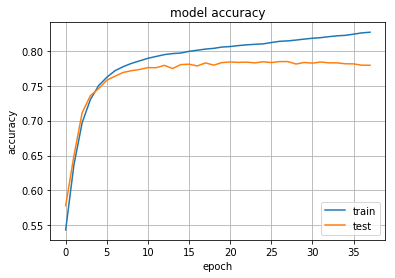

In [192]:
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [193]:
accuracy_score(y_test, np.round(model_rnn.predict(X_test)))

0.7803

In [194]:
target_names = ['neg', 'pos']
print(classification_report(y_test, np.round(model_rnn.predict(X_test)), target_names=target_names))

              precision    recall  f1-score   support

         neg       0.79      0.77      0.78     29922
         pos       0.77      0.79      0.78     30078

   micro avg       0.78      0.78      0.78     60000
   macro avg       0.78      0.78      0.78     60000
weighted avg       0.78      0.78      0.78     60000



In [224]:
def pred_sequence(text):
    
    seq = sequence.pad_sequences(tokenizer.texts_to_sequences([text]), maxlen = len_max)
    
    return "positivo" if np.round(model_rnn.predict(seq))[0][0] > 0 else "negativo"

### Testes concretos (RNN)

### Frases curtas

In [226]:
pred_sequence("I'm very excited today! I have a job interview tomorrow!")

'positivo'

In [227]:
pred_sequence("the police raid my apartment while I was keeping illegal stuff")

'negativo'

In [231]:
pred_sequence("I'm going to the gym with my friends now")

'positivo'

In [228]:
pred_sequence("my girlfriend left me")

'negativo'

In [230]:
pred_sequence("in the end, the launch was a huge success")

'positivo'

In [229]:
pred_sequence("that product was a complete failure")

'negativo'

In [241]:
pred_sequence("very useful and reliable")

'positivo'

In [232]:
pred_sequence("I had no doubt it'd be a complete mess")

'negativo'

In [245]:
pred_sequence("Bought this for my grandson and he is so thrilled with it. "+
              "Was so glad to see the smile on his face when it arrived")

'positivo'

### Reviews Cyberpunk 2077 

In [238]:
pred_sequence("The game isn't perfect. The game isn't majorly groundbreaking." +
              "However this game has a beautiful open world with a ton of fun")

'positivo'

In [242]:
pred_sequence("absolute garbage and stale gameplay" +
              "that reminds me of Borderlands, and badly optimized in general.")

'negativo'

### Reviews 12 Rules for Life: An Antidote to Chaos 

In [243]:
pred_sequence("Even though I’m well past sixty, I found Jordan Peterson’s words to be "+
              "inspiring and a solid guideline to face the mishaps that life throws accross our paths.")

'positivo'

In [244]:
pred_sequence("I quite like Jordan Peterson. I think he has interesting things to say."+
              " I think he's unfairly criticised, often for things he hasn't said. "+
              "I was curious what he had to say here so I went as far as paying money"+
              " to find out, which was a mistake.")

'negativo'